In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

x_train: (60000, 28, 28) y_train: (60000,) shape of first image in x_train AxesImage(54,36;334.8x217.44) (28, 28)


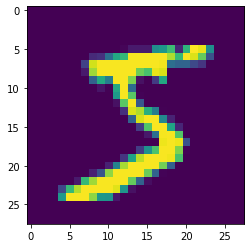

In [2]:
# loading the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt # to see one of the data set images 
print('x_train:', x_train.shape,'y_train:' , y_train.shape , 'shape of first image in x_train' , plt.imshow(x_train[0]) , x_train[0].shape)

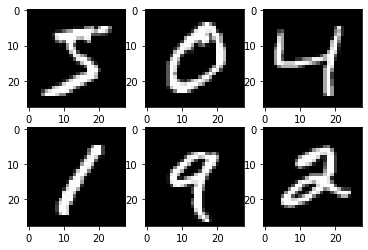

In [3]:
#plot first six samples of MNIST training dataset as gray scale image
import matplotlib.pyplot as plt 
for i in range (6):
    plt. subplot(int('23' + str(i+1))) 
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray') )

In [4]:
#Data pre-processing
#Next, we need to reshape our dataset inputs (X_train and X_test) 
#to the shape that our model expects when we train the model. 
#The first number is the number of images (60,000 for X_train and 10,000 for X_test). 
#Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# We need to ‘one-hot-encode’ our target variable. 
# This means that a column will be created for each output category and a binary variable is inputted for each category. 
# For example, we saw that the first image in the dataset is a 5. 
# This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [7]:
# convert class vectors to binary class matrices
#one-hot encode target column
y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical(y_test , 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
batch_size = 200
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train , y_train  ,batch_size=batch_size , epochs=epochs , verbose=1 , validation_data=(x_test, y_test) )
print("The model has successfully trained")

Epoch 1/10
300/300 [==============================] - 82s 270ms/step - loss: 2.2993 - accuracy: 0.1161 - val_loss: 2.2650 - val_accuracy: 0.2319
Epoch 2/10
300/300 [==============================] - 117s 390ms/step - loss: 2.2456 - accuracy: 0.2175 - val_loss: 2.2023 - val_accuracy: 0.4207
Epoch 3/10
300/300 [==============================] - 58s 193ms/step - loss: 2.1843 - accuracy: 0.3175 - val_loss: 2.1288 - val_accuracy: 0.5608
Epoch 4/10
300/300 [==============================] - 55s 185ms/step - loss: 2.1102 - accuracy: 0.4073 - val_loss: 2.0360 - val_accuracy: 0.6434
Epoch 5/10
300/300 [==============================] - 56s 186ms/step - loss: 2.0157 - accuracy: 0.4861 - val_loss: 1.9163 - val_accuracy: 0.6978
Epoch 6/10
300/300 [==============================] - 56s 187ms/step - loss: 1.8944 - accuracy: 0.5480 - val_loss: 1.7638 - val_accuracy: 0.7391
Epoch 7/10
300/300 [==============================] - 58s 195ms/step - loss: 1.7443 - accuracy: 0.5997 - val_loss: 1.5804 - val_a

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0271421670913696
Test accuracy: 0.8133999705314636


In [10]:
import os
os.chdir(r'C:\Users\HP\Downloads\model')
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
